# 分销商产品销售情况分析

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [76]:
%matplotlib inline
plt.style.use("ggplot")

mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.family']= 'SimHei'
mpl.rcParams['axes.unicode_minus']=False

pd.set_option("precision", 2)
pd.set_option("display.float_format", lambda x: "%.2f" % x)

## 第一部分：数据读取及概览

In [3]:
df_sales = pd.read_csv("sales_train.csv")
df_categories = pd.read_csv("item_categories.csv")
df_items = pd.read_csv("items.csv")
df_shops = pd.read_csv("shops.csv")

- sales_train_v2.csv：训练数据集，包含 2013 年到 2015 年的历史销售数据；
- item_categories.csv：销售商品的类别信息；
- items.csv：销售商品名称；
- shops.csv：销售商店的名称；

In [4]:
df_sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.00
1,03.01.2013,0,25,2552,899.00,1.00
2,05.01.2013,0,25,2552,899.00,-1.00
3,06.01.2013,0,25,2554,1709.05,1.00
4,15.01.2013,0,25,2555,1099.00,1.00


- data：时间信息；
- date_block_num：月数，例如：将 2013.2 看做是 1 月，2014.2 看作是 13 月；
- shop_id：商店的 ID；
- item_id：商品的 ID；
- item_price：商品的价格；
- item_cnt_day：商品每天的销售量。

In [5]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [6]:
df_sales.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2935849.00,2935849.00,2935849.00,2935849.00,2935849.00
mean,14.57,33.00,10197.23,890.85,1.24
std,9.42,16.23,6324.30,1729.80,2.62
min,0.00,0.00,0.00,-1.00,-22.00
25%,7.00,22.00,4476.00,249.00,1.00
50%,14.00,31.00,9343.00,399.00,1.00
75%,23.00,47.00,15684.00,999.00,1.00
max,33.00,59.00,22169.00,307980.00,2169.00


In [7]:
df_sales.date = pd.to_datetime(df_sales.date, format="%d.%m.%Y")
df_sales["monthly"] = df_sales.date.dt.month
df_sales["weekday"] = df_sales.date.dt.weekday
df_sales["daily"] = df_sales.date.dt.day
df_sales["month"] = df_sales.date.dt.to_period("M")
df_sales["year"] = df_sales.date.dt.to_period("Y")
df_sales.sort_values("date", inplace=True)

In [8]:
df_sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,monthly,weekday,daily,month,year
49800,2013-01-01,0,18,5823,2500.00,1.00,1,1,1,2013-01,2013
29784,2013-01-01,0,27,5573,849.00,1.00,1,1,1,2013-01,2013
35476,2013-01-01,0,7,1006,399.00,1.00,1,1,1,2013-01,2013
8330,2013-01-01,0,19,17707,899.00,1.00,1,1,1,2013-01,2013
57384,2013-01-01,0,14,19548,149.00,1.00,1,1,1,2013-01,2013


In [9]:
df_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [10]:
df_items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [11]:
df_shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [12]:
df_sales["total_sales"] = df_sales.item_price * df_sales.item_cnt_day
df_sales.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,monthly,weekday,daily,total_sales
count,2935849.00,2935849.00,2935849.00,2935849.00,2935849.00,2935849.00,2935849.00,2935849.00,2935849.00
mean,14.57,33.00,10197.23,890.85,1.24,6.25,3.37,15.85,1157.73
std,9.42,16.23,6324.30,1729.80,2.62,3.54,2.00,8.92,5683.60
min,0.00,0.00,0.00,-1.00,-22.00,1.00,0.00,1.00,-68970.00
25%,7.00,22.00,4476.00,249.00,1.00,3.00,2.00,8.00,249.00
50%,14.00,31.00,9343.00,399.00,1.00,6.00,4.00,16.00,449.00
75%,23.00,47.00,15684.00,999.00,1.00,9.00,5.00,24.00,1078.20
max,33.00,59.00,22169.00,307980.00,2169.00,12.00,6.00,31.00,1829990.00


In [13]:
# 连接产品信息，分类信息，店铺信息表
df_sales = pd.merge(df_sales, df_items, on="item_id", how="inner")
df_sales = pd.merge(df_sales, df_categories, on="item_category_id", how="inner")
df_sales = pd.merge(df_sales, df_shops, on="shop_id", how="inner")

In [14]:
df_sales.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,monthly,weekday,daily,month,year,total_sales,item_name,item_category_id,item_category_name,shop_name
2935844,2015-10-22,33,55,13095,500.00,2.00,10,3,22,2015-10,2015,1000.00,Карта оплаты Windows: 500 рублей [Цифровая вер...,36,Карты оплаты - Windows (Цифра),Цифровой склад 1С-Онлайн
2935845,2015-09-16,32,55,13094,2500.00,1.00,9,2,16,2015-09,2015,2500.00,Карта оплаты Windows: 2500 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра),Цифровой склад 1С-Онлайн
2935846,2015-09-22,32,55,13094,2500.00,2.00,9,1,22,2015-09,2015,5000.00,Карта оплаты Windows: 2500 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра),Цифровой склад 1С-Онлайн
2935847,2015-09-21,32,55,13091,1000.00,1.00,9,0,21,2015-09,2015,1000.00,Карта оплаты Windows: 1000 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра),Цифровой склад 1С-Онлайн
2935848,2015-10-26,33,55,13092,2000.00,1.00,10,0,26,2015-10,2015,2000.00,Карта оплаты Windows: 2000 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра),Цифровой склад 1С-Онлайн


## 整体销售情况分析

### 总销售额随时间规律

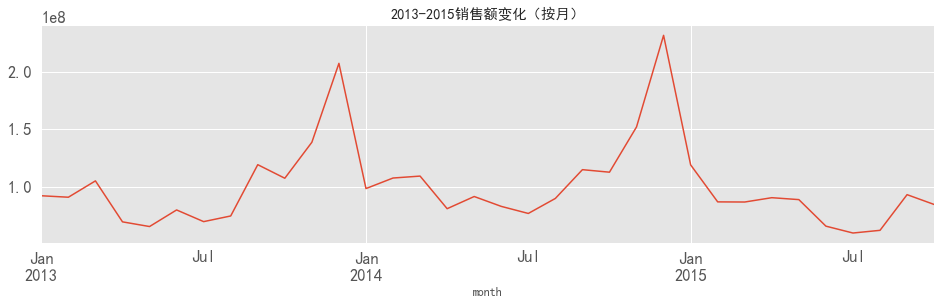

In [70]:
df_sales.groupby("month").total_sales.sum().plot(figsize=(16,4), title="2013-2015销售额变化（按月）")

2013-2015年内，总销售额均在下半年明显增长。

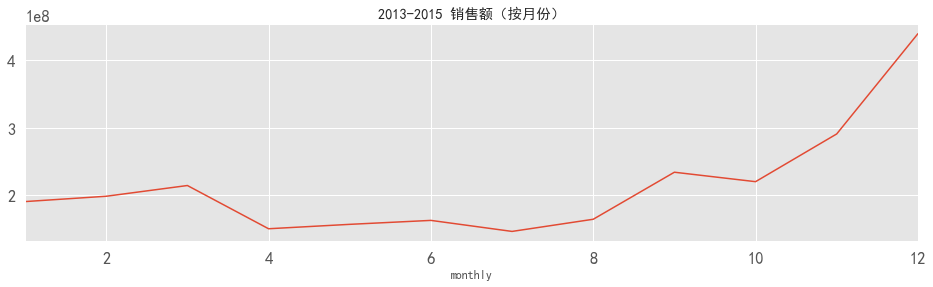

In [71]:
df_sales[df_sales["date"] < "2015-01-01"].groupby("monthly").total_sales.sum().plot(figsize=(16,4), title="2013-2015 销售额（按月份）")

按月度统计，发现总销量在11月-12月期间，出现大幅上涨。猜测为感恩节、圣诞节活动促销所致。
而4月-8月，销量低迷，销售额显著低于其他月份。

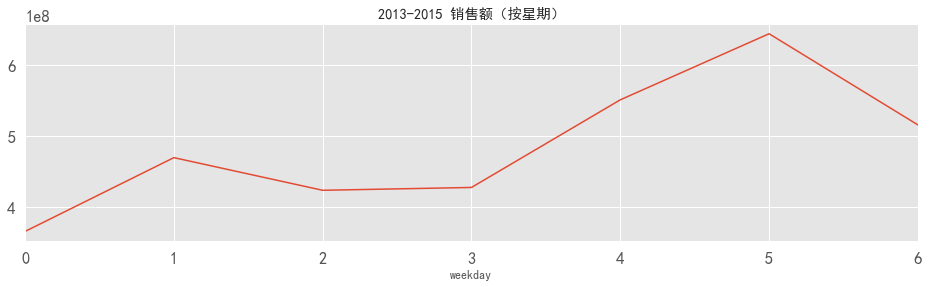

In [72]:
df_sales.groupby("weekday").total_sales.sum().plot(figsize=(16,4), title="2013-2015 销售额（按星期）")

按星期统计，从周四开始，销售额开始增长，在周五达到顶峰。

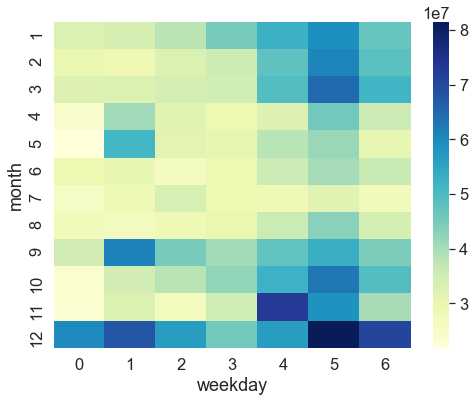

In [73]:
sales_hteamap_table = df_sales.groupby(["monthly","weekday"]).total_sales.sum()
sales_hteamap_table = sales_hteamap_table.rename_axis(["month", "weekday"]).unstack("weekday")

plt.figure(figsize=(8,6))
sns.set(font_scale=1.5)
sns.heatmap(sales_hteamap_table, cmap="YlGnBu")

按月份及星期，热力图显示，销量规律如上所述：
- 每年中12月销量最高，周五周六销量最高
- 11月中，周四销量最高，猜测为感恩节活动促销所致。4月、5月、9月的周一数据均有异常，原因未知。猜测为，学生放假？

## 品类、商品、分销商总销售额概览

### 分销商总销售额
2013-2015年，**总销售额前5**的分销商中**莫斯科有3家**。  
前5的分销商ID分别为：31，25，28，42，54  

array([31, 25, 28, 42, 54, 27, 57, 12,  6, 18], dtype=int64)

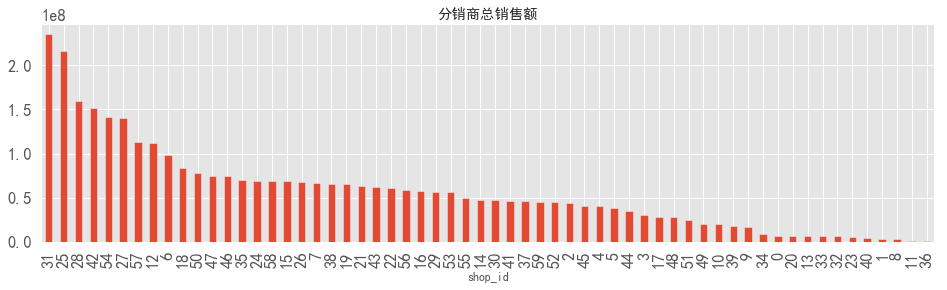

In [221]:
grouped_shop_sales = df_sales.groupby("shop_id").total_sales
display(grouped_shop_sales.sum().sort_values(ascending=False)[:10].index.values)
grouped_shop_sales.sum().sort_values(ascending=False).plot(kind="bar", figsize=(16,4), title="分销商总销售额")

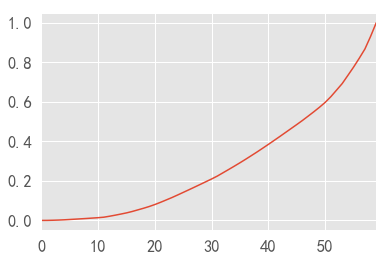

In [215]:
shop_sales_cunsum = grouped_shop_sales.sum().sort_values()
shop_sales_cunsum = shop_sales_cunsum.reset_index().apply(lambda x: x.cumsum()/x.sum())
shop_sales_cunsum.total_sales.plot()

销售额排行，叠加累计求和曲线图，可以看出，排名前20的对销售额贡献最大，占总销售额的60%。

### 品类总销售额
2013-2015年，**总销售额前5的品类**分别为：
- PS3游戏
- PS4游戏
- PS4游戏机 
- XBOX360游戏
- PC游戏

item_category_id
19   412050280.90
20   373010312.01
12   292239761.98
23   259619128.35
30   257519291.08
Name: total_sales, dtype: float64

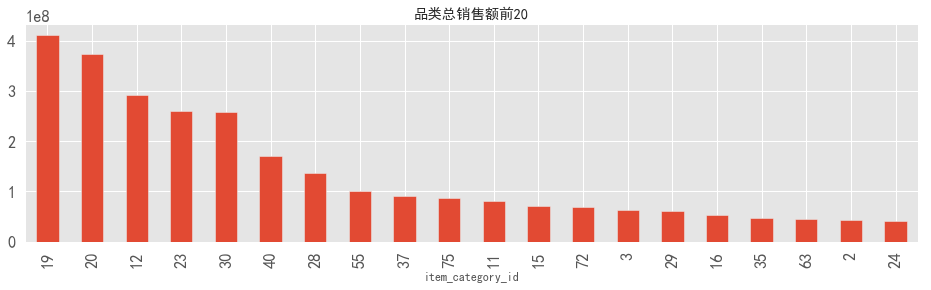

In [78]:
grouped_cat_sales = df_sales.groupby("item_category_id").total_sales
display(grouped_cat_sales.sum().sort_values(ascending=False)[:5])
grouped_cat_sales.sum().sort_values(ascending=False)[:20].plot(kind="bar", figsize=(16,4), title="品类总销售额前20")

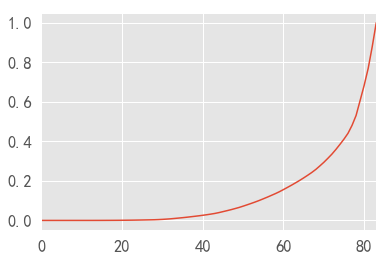

In [236]:
cat_sales_cunsum = grouped_cat_sales.sum().sort_values()
cat_sales_cunsum = cat_sales_cunsum.reset_index().apply(lambda x: x.cumsum()/x.sum())
cat_sales_cunsum.total_sales.plot()

### 商品总销售额
2013-2015年，**总销售额前5的产品**分别为：
- PS4游戏机
- GTA5（PS3）
- PS4游戏机+GTA5套件
- GTA5（XBOX360）
- GTA5（PS4）

item_id
6675    219391488.92
3732     43617975.48
13443    34331245.28
3734     31065160.27
3733     22298864.36
Name: total_sales, dtype: float64

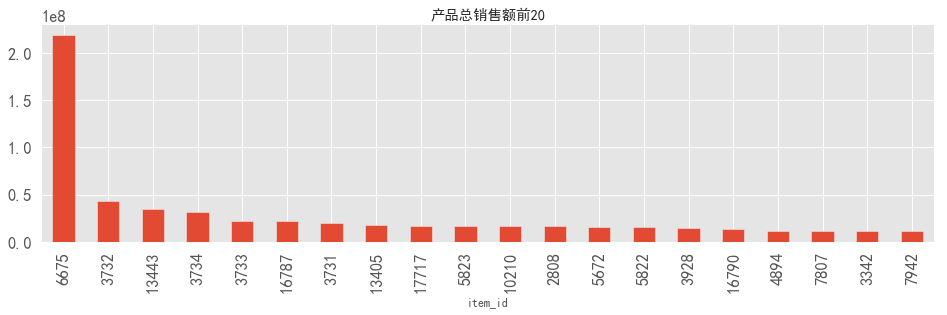

In [79]:
grouped_item_sales = df_sales.groupby("item_id").total_sales
display(grouped_item_sales.sum().sort_values(ascending=False)[:5])
grouped_item_sales.sum().sort_values(ascending=False)[:20].plot(kind="bar", figsize=(16,4), title="产品总销售额前20")

## 分销商、产品价值分析（RFM模型）

### 分销商年度销售额

In [183]:
year_sale_shop = df_sales.groupby(["shop_id", "year"]).sum().total_sales.unstack()

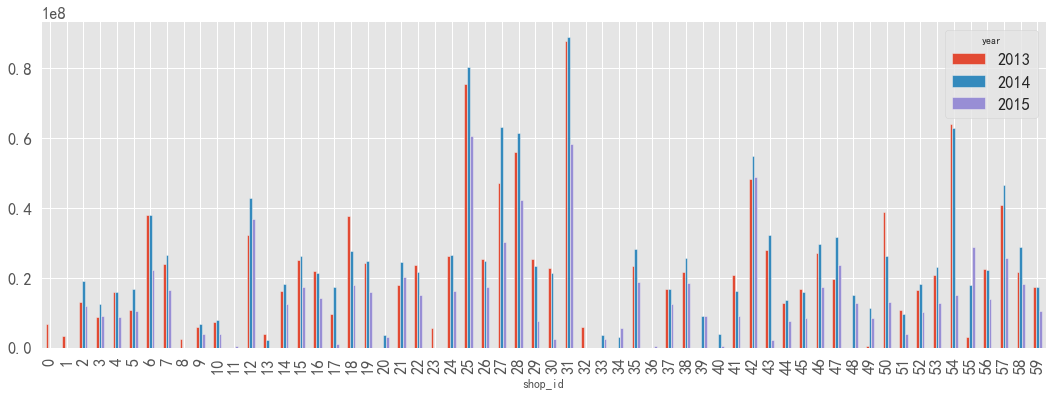

In [186]:
year_sale_shop.plot.bar(figsize=(18,6))


2015年销售额均低于2014年，原因是数据截止至2015年10月，缺失了销售额最高的11月和12月。  

In [124]:
top_shop_id = df_sales.groupby("shop_id").total_sales.sum().sort_values(ascending=False).index.sort_values()
display(top_shop_id)
top_shop_year = df_sales[df_sales.shop_id.isin(top_shop_id)].groupby(["year", "shop_id"]).total_sales.sum()
top_shop_year = pd.DataFrame(top_shop_year)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59],
           dtype='int64', name='shop_id')

In [125]:
for i in top_shop_id:
    top_shop_year.loc[(slice(None),i),"rise_rate"]= (top_shop_year.loc[(slice(None),i),:]["total_sales"] / top_shop_year.loc[(slice(None),i),:]["total_sales"] .shift() - 1).values
rise_rate_2014 = top_shop_year.loc[("2014",slice(None)),:].sort_values("rise_rate",ascending=False)
rise_rate_2014.reset_index(inplace=True)
rise_rate_2014.dropna(inplace=True)

In [175]:
display(rise_rate_2014[rise_rate_2014.rise_rate>0].count())
display(rise_rate_2014[rise_rate_2014.rise_rate<0].count())

year           33
shop_id        33
total_sales    33
rise_rate      33
dtype: int64

year           14
shop_id        14
total_sales    14
rise_rate      14
dtype: int64

2014年有14家增长率为负，占比30%，33家为正，占比70%。增长

In [241]:
rise_rate_2014.loc[2:10]

,year,shop_id,total_sales,rise_rate
2,2014,17,17246666.30,0.79
3,2014,47,31591739.43,0.60
4,2014,5,16794175.02,0.55
5,2014,2,19039238.50,0.45
6,2014,3,12443865.00,0.44
7,2014,21,24466968.20,0.37
8,2014,27,63231354.80,0.34
9,2014,58,28933488.00,0.33
10,2014,12,42948167.52,0.33


In [250]:
rise_rate_2014.tail(14)

,year,shop_id,total_sales,rise_rate
33,2014,4,15845497.37,-0.00
34,2014,16,21441216.30,-0.02
35,2014,54,62977330.58,-0.02
36,2014,26,24922186.70,-0.02
37,2014,56,22175528.80,-0.02
38,2014,45,15807405.00,-0.05
39,2014,30,21279845.50,-0.07
40,2014,29,23491290.50,-0.08
41,2014,22,21785407.79,-0.08
42,2014,51,9688030.90,-0.10


Text(0.5,1,'增长率2-10')

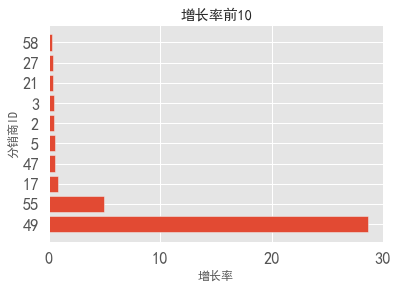

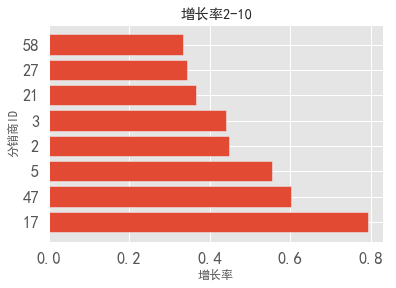

In [190]:
plt.figure()
plt.barh(range(10),rise_rate_2014.head(10).rise_rate)
plt.yticks(range(10), rise_rate_2014.head(10).shop_id)
plt.xlabel("增长率")
plt.ylabel("分销商ID")
plt.title("增长率前10")
plt.figure()
plt.barh(range(8),rise_rate_2014.loc[2:9].rise_rate)
plt.yticks(range(8),rise_rate_2014.loc[2:9].shop_id)
plt.xlabel("增长率")
plt.ylabel("分销商ID")
plt.title("增长率2-10")

增长率最高的10家分销商中，ID为55、49的数据异常，原因为这两家2013年数据不全。  
剔除后，前8家增长率均在30%以上，其中ID为5、47、17的分销商表现尤其突出，均在50%以上。

### 分销商分级
按最近销售日期距今天数、销售频次、销售总额划分，以各项平均值为划分基准，分为：
- 重要保持分销商
- 重要价值分销商
- 重要发展分销商
- 重要挽留分销商
- 一般保持分销商
- 一般价值分销商
- 一般发展分销商
- 一般挽留分销商

In [192]:
rfm = df_sales.pivot_table(index="shop_id", 
                     values=["date", "month", "total_sales"],
                     aggfunc={"date":"max", "month":"count", "total_sales":"sum"})
rfm.head()

,date,month,total_sales
shop_id,,,
0,2013-02-28,9857,6637370.00
1,2013-02-28,5678,3238207.00
2,2015-10-31,25991,44049638.80
3,2015-10-31,25532,30140853.87
4,2015-10-31,38242,40539650.32


In [193]:
rfm["R"] = -(rfm.date - rfm.date.max())/np.timedelta64(1,"D")
rfm.rename(columns={"month":"F", "total_sales":"M"}, inplace=True)
rfm.head()

,date,F,M,R
shop_id,,,,
0,2013-02-28,9857,6637370.00,975.00
1,2013-02-28,5678,3238207.00,975.00
2,2015-10-31,25991,44049638.80,0.00
3,2015-10-31,25532,30140853.87,0.00
4,2015-10-31,38242,40539650.32,0.00


In [199]:
def rfm_level(x):
    level = x.apply(lambda x:"1" if x >= 0 else "0")
    label = level.R + level.F + level.M
    d = {
        '011':'重要价值分销商',
        '111':'重要保持分销商',        
        '101':'重要发展分销商',
        '001':'重要挽留分销商',
        '010':'一般价值分销商',
        '110':'一般保持分销商',        
        '100':'一般发展分销商',
        '000':'一般挽留分销商'
    }
    result = d[label]
    return result

In [200]:
rfm["label"] = rfm[["R", "F", "M"]].apply(lambda x: x-x.mean()).apply(rfm_level, axis=1)
rfm.head()

,date,F,M,R,label
shop_id,,,,,
0,2013-02-28,9857,6637370.00,975.00,一般发展分销商
1,2013-02-28,5678,3238207.00,975.00,一般发展分销商
2,2015-10-31,25991,44049638.80,0.00,一般挽留分销商
3,2015-10-31,25532,30140853.87,0.00,一般挽留分销商
4,2015-10-31,38242,40539650.32,0.00,一般挽留分销商


重要价值分销商有21家，占比35%，此类分销商近期有订单，且累计订单数和销售额均大于平均值，是重点维护对象；  
一般发展分销商有10家，占比17%，此类经销商近期有订单，但累计订单数和销售额均小于平均值，是新客户，可重点开发。  
一般挽留分销商有21家，此类分销商可视作流失客户。

In [262]:
df_rfm

,R,F,M,pct
label,,,,
一般挽留分销商,21,21,21,0.35
重要价值分销商,21,21,21,0.35
一般发展分销商,10,10,10,0.17
重要挽留分销商,3,3,3,0.05
一般保持分销商,2,2,2,0.03
一般价值分销商,1,1,1,0.02
重要保持分销商,1,1,1,0.02
重要发展分销商,1,1,1,0.02


In [260]:
df_rfm = rfm.groupby("label").count().sort_values("F",ascending=False)
df_rfm["pct"] = df_rfm["F"]/df_rfm["F"].sum()
df_rfm.drop(labels="date",inplace=True,axis=1)
df_rfm.columns=["R","F","M","pct"]

In [261]:
rfm.loc[rfm.label == "重要价值分销商"]

,date,F,M,R,label
shop_id,,,,,
6,2015-10-31,82663,98067453.80,0.00,重要价值分销商
7,2015-10-31,58076,66957658.55,0.00,重要价值分销商
15,2015-10-31,59511,68710368.40,0.00,重要价值分销商
16,2015-10-31,52734,57436486.63,0.00,重要价值分销商
18,2015-10-31,53227,83392700.99,0.00,重要价值分销商
19,2015-10-31,63911,64953921.55,0.00,重要价值分销商
21,2015-10-31,58133,62581387.84,0.00,重要价值分销商
24,2015-10-31,53032,68811693.47,0.00,重要价值分销商
25,2015-10-31,186104,216480571.44,0.00,重要价值分销商


In [254]:
rfm.loc[rfm.index.isin([4,17,47])]

,date,F,M,R,label
shop_id,,,,,
4,2015-10-31,38242,40539650.32,0.00,一般挽留分销商
17,2015-01-18,22950,27784948.30,286.00,一般发展分销商
47,2015-10-31,56695,74882096.25,0.00,重要价值分销商
